# First pass analysis of line/loop data


### 1. recover the graphs from the pokes
### 2. Figure out what fraction of pokes are into lit-up ports

#### try to find the average poke time


## Plots to make

<ul>
    <li> Poke occupancy </li>
    <li> fraction of pokes to lit up ports </li>
    <li> Basic multinomial regression choice model </li>
    <li> Fraction of pokes in the 'correct' direction </li>
</ul>

In [367]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os
import re
import sys
import networkx as nx

In [343]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [344]:
f = open("/Users/Yves/Downloads/line_loop_batch_1/line_loop_batch_2/'424550_10'-2020-01-30-170235.txt",'r')

In [401]:
ROOT2 = '/Users/Yves/Desktop/mouse_behavior/line_loop_batch_2'

In [402]:
res = {'mouse': [],
       'task_nr': [],
       'graph_id': [],
       'edges': [],
       'lineloop': []}
for f_ in [i for i in os.listdir(ROOT2) if '02-01' in i]:
    #try:
    pth = os.path.join(ROOT2,f_)
    if os.path.isfile(pth):
        f = open(pth,'r')
        lines =f.readlines()
        if len(lines)>50:
            text2 = ''.join(lines)
            state_dict = eval(re.findall('({.*)\n',text2)[0])
            state_dict = dict([(v,k) for k,v in state_dict.items()])
            event_dict = eval(re.findall('({.*)\n',text2)[1])
            event_dict = dict([(v,k) for k,v in event_dict.items()])

            experiment_name, task_name, subject_id, task_nr, graph, lineloop, date = get_metadata(lines)
            dat_dict, events, event_times = parse_data(lines)
            edges = list(set(reconstruct_graph(dat_dict)))
            res['mouse'].append(subject_id[1:-1])
            res['task_nr'].append(task_nr)
            res['graph_id'].append(graph)
            res['edges'].append(edges)
            res['lineloop'].append(lineloop)
    ##except:
    #    pass

In [403]:
ix = -3
print(res['mouse'][ix],'|  task_nr' + str(res['task_nr'][ix]),'  line/loop: ' + res['lineloop'][ix])
edges = res['edges'][ix]

424550_1 |  task_nr2   line/loop: LINE


In [404]:
uniq_mice = sorted(list(set(res['mouse'])))

In [405]:
uniq_mice

['418688_1',
 '418688_10',
 '419544_1',
 '419544_10',
 '419544_30',
 '424550_1',
 '424550_10',
 '424551_1',
 '424551_10']

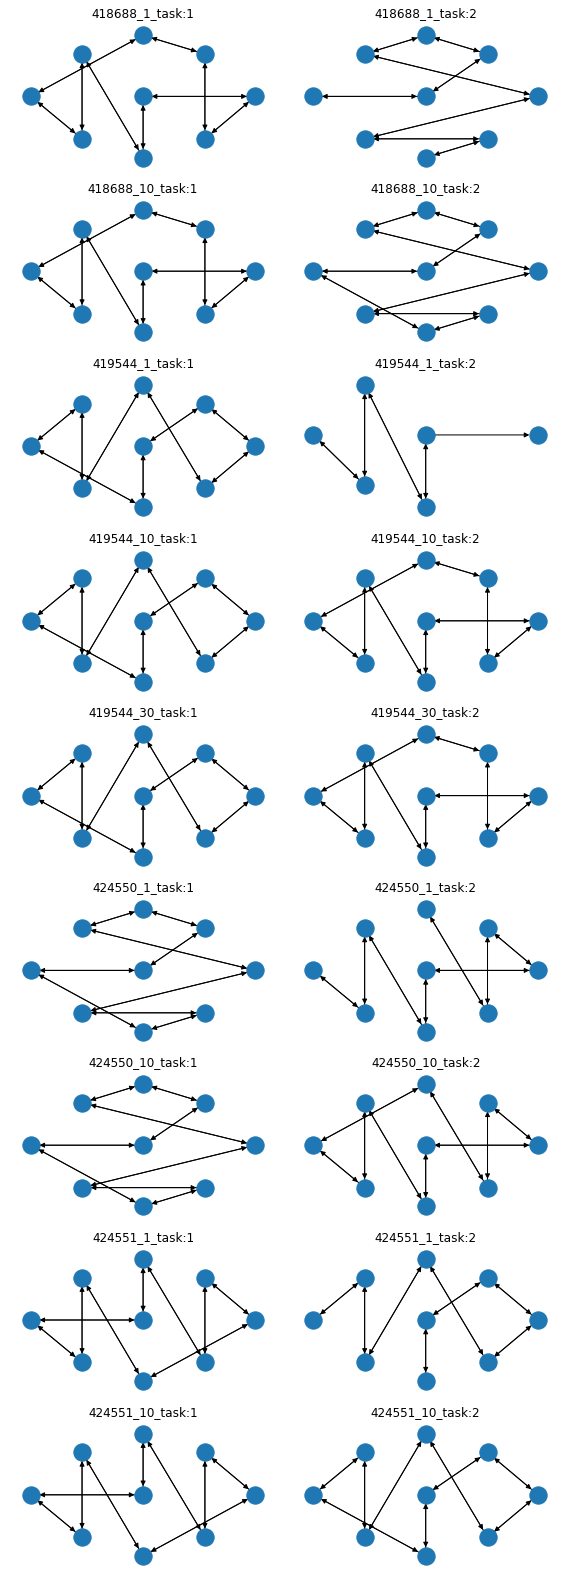

In [406]:
plt.figure(figsize=(8,22))
ijk = 0
for m in uniq_mice:
    
    for kk,msID in enumerate(res['mouse']):
        if msID==m:
            if res['task_nr'][kk]=='1':
                #print(ijk)
                plt.subplot(9,2,1 + ijk*2)
                plt.title(m + '_task:' + str(res['task_nr'][kk]))
                edges = res['edges'][kk]
                G = nx.DiGraph()
                G.add_edges_from([i for i in edges if None not in i])
                nx.draw(G,
                pos=np.array([1,-1])*poke_pos)
            else:
                #print(ijk,2)
                plt.subplot(9,2,2 + ijk*2)
                plt.title(m + '_task:' + str(res['task_nr'][kk]))
                edges = res['edges'][kk]
                G = nx.DiGraph()
                G.add_edges_from([i for i in edges if None not in i])
                nx.draw(G,
                pos=np.array([1,-1])*poke_pos)
    ijk += 1
plt.tight_layout()

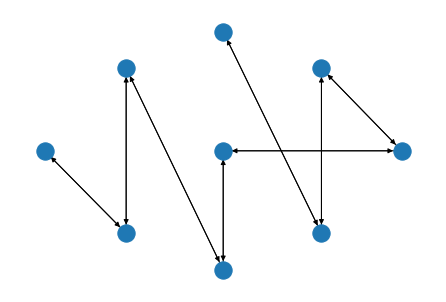

In [362]:
G = nx.DiGraph()
G.add_edges_from([i for i in edges if None not in i])
nx.draw(G,
        pos=np.array([1,-1])*poke_pos)

In [251]:
for kk in range(len(res['mouse'])):
    print(res['mouse'][kk],res['task_nr'][kk],res['graph_id'][kk],res['lineloop'][kk])

'419544_1' 1 G2_0 LOOP
'419544_10' 2 G2_1 LOOP
'424551_1' 1 G1_0 LOOP
'418688_10' 1 G3_0 LOOP
'419544_1' 1 G2_0 LOOP
'418688_10' 1 G3_0 LOOP
'424551_1' 1 G1_0 LOOP
'424550_10' 2 G4_1 LOOP
'419544_30' 1 G2_0 LOOP
'424551_10' 1 G1_0 LOOP
'418688_1' 1 G3_0 LOOP
'419544_30' 1 G2_0 LOOP
'424551_10' 1 G1_0 LOOP
'424550_1' 1 G4_0 LOOP
'419544_1' 2 G2_1 LINE
'424550_10' 1 G4_0 LOOP
'418688_10' 2 G3_1 LOOP
'419544_10' 1 G2_0 LOOP
'424550_10' 1 G4_0 LOOP
'424551_1' 2 G1_1 LINE
'419544_30' 2 G2_1 LOOP
'424551_10' 2 G1_1 LOOP
'424550_1' 2 G4_1 LINE
'418688_1' 2 G3_1 LINE


In [203]:
lines =f.readlines()

In [204]:
text2 = ''.join(lines)

In [205]:
state_dict = eval(re.findall('({.*)\n',text2)[0])
state_dict = dict([(v,k) for k,v in state_dict.items()])
event_dict = eval(re.findall('({.*)\n',text2)[1])
event_dict = dict([(v,k) for k,v in event_dict.items()])


In [330]:
def get_metadata(lines):
    """ Get metadata from the beginning of the file """
    
    for l in lines:
        if re.findall('I Experiment name  : (.*?)\n',l): experiment_name = re.findall('I Experiment name  : (.*?)\n',l)[0]
        
        if re.findall('Task name : (.*?)\n',l): task_name = re.findall('Task name : (.*?)\n',l)[0]
        
        if re.findall('Subject ID : (.*?)\n',l): subject_id = re.findall('Subject ID : (.*?)\n',l)[0]
            
        if re.findall('Start date : (.*?)\n',l): date = re.findall('Start date : (.*?)\n',l)[0]
        
        #################################################################################
        #### Specific to this task
        #################################################################################

        if re.findall('V.*? task_nr (.*?)\n',l): task_nr = re.findall('V.*? task_nr (.*?)\n',l)[0]
            
        if re.findall('P.*? (G[0-9]_[0-9])\n',l): graph = re.findall('P.*? (G[0-9]_[0-9])\n',l)[0]

        if re.findall('P .* (LOOP|LINE)\n',l): lineloop = re.findall('P .* (LOOP|LINE)\n',l)[0]
    return experiment_name, task_name, subject_id, task_nr, graph, lineloop, date

In [331]:
get_metadata(lines)

('line_loop_batch_2',
 'transition_task_yw',
 "'419544_1'",
 '1',
 'G2_0',
 'LOOP',
 '2020/02/01 12:00:52')

In [297]:
lines[:50]

['I Experiment name  : line_loop_batch_1\n',
 'I Task name : transition_task_yw\n',
 'I Task file hash : 3782189307\n',
 "I Subject ID : '424551_None'\n",
 'I Start date : 2020/01/30 16:01:58\n',
 '\n',
 'S {"reward_consumption": 2, "handle_poke": 1, "deliver_reward": 3, "free_rewards": 4}\n',
 '\n',
 'E {"rew_timer1": 26, "poke_2_out": 8, "poke_8_out": 20, "rew_timer2": 27, "rew_timer3": 28, "rew_timer": 25, "rew_timer4": 29, "poke_3_out": 10, "poke_9": 21, "poke_8": 19, "poke_5_out": 14, "poke_3": 9, "poke_2": 7, "poke_1": 5, "poke_4_out": 12, "poke_6_out": 16, "poke_7": 17, "poke_6": 15, "poke_1_out": 6, "poke_5": 13, "poke_4": 11, "poke_7_out": 18, "poke_9_out": 22, "end_consumption": 23, "session_timer": 24}\n',
 '\n',
 'V 0 task_nr 2\n',
 'V 0 reward_volume 10\n',
 'V 0 reward_absorbP 0.25\n',
 'V 0 click_volume 20\n',
 'V 0 setup_number 1\n',
 'V 0 subject_id 424551_None\n',
 '\n',
 'P 0 G1_1\n',
 'P 0 LOOP\n',
 'D 2 1\n',
 'D 2 4\n',
 'D 490 11\n',
 'P 492 [False, True, False, 

In [ ]:
re.findall('D [-0-9]* []','D 210186 6\n')

In [302]:
def parse_data(lines):
    start_read = False #placeholder variable that ignores the period where just free rewards are available
    event_times = []
    events = []
    alldat = []
    dat_times = []
    dat_dict = {'state': [],
                'port': [],
                'random': []}


    tot_pokes = 0

    state_dict = eval(re.findall('({.*)\n',text2)[0])
    state_dict = dict([(v,k) for k,v in state_dict.items()])
    event_dict = eval(re.findall('({.*)\n',text2)[1])
    event_dict = dict([(v,k) for k,v in event_dict.items()])

    for l in lines:


        if l[0]=='D':
            if start_read:
                tmp = float(re.findall('D ([-0-9]*)',l)[0])/1000.
                ev = int(re.findall('D [-0-9]* ([0-9]{1,3})',l)[0])
                event_times.append(tmp)
                if ev in list(event_dict.keys()):
                    events.append(event_dict[ev])

                    if event_dict[ev][-1] in [str(i) for i in range(9)]:
                        tot_pokes += 1
                #event_dict.keys()

        elif l[0]=='P':
            if 'POKEDSTATE' in l:
                start_read = True

            if start_read:
                tmp = float(re.findall('P ([-0-9]*)',l)[0])/1000.
                dat = re.findall('P [-0-9]* (.*)\n',l)[0]
                if 'POKE' in dat:

                    tmp = re.findall("RANDOM_([A-z]*?)_",dat)
                    if tmp: dat_dict['random'].append(eval(tmp[0]))

                    now,avail,dtype = parse_dat(dat)
                    dat_dict[dtype].append([now,avail])
                    #alldat.append(dat)
                    dat_times.append(tmp)
    return dat_dict, events, event_times

In [181]:
def reconstruct_graph(dat_dict):
    
    nEntries = len(dat_dict['random'])
    edges = []
    for i in range(nEntries):
        if not dat_dict['random'][i]:
            edges.append((dat_dict['port'][i][0],dat_dict['port'][i][1][0]))
            edges.append((dat_dict['port'][i][0],dat_dict['port'][i][1][1]))
    return edges

In [185]:
edges = list(set(reconstruct_graph(dat_dict)))

In [188]:
G = nx.DiGraph()
G.add_edges_from(edges)

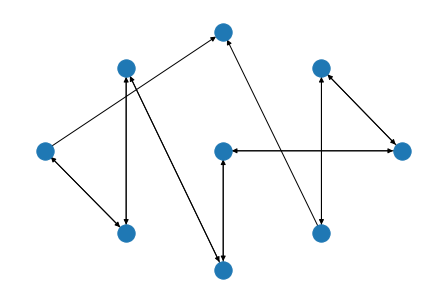

In [209]:
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G,
        pos=np.array([1,-1])*poke_pos)

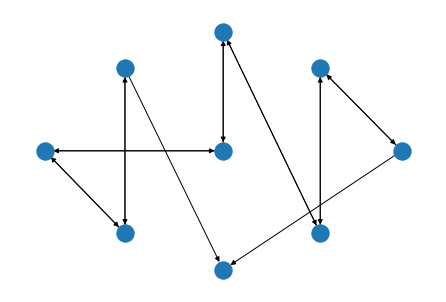

In [211]:
nx.draw(G,
        pos=np.array([-1,1])*poke_pos)

In [341]:
def parse_dat(text):
    """ function that takes data in and returns meaningful stuff """
    if 'PORT' in text:
        now = int(re.findall('POKEDPORT_([0-9]{1,2})',text)[0])
        avail = eval(re.findall('_NOWPOKES_(\[.*?\])_',text)[0])
        dtype = 'port'
    elif 'STATE' in text:
        now = int(re.findall('_NOWSTATE_([0-9]{1,2})',text)[0])
        avail = eval(re.findall('_AVAILSTATES_(\[.*?\])',text)[0])
        dtype = 'state'

    return now,avail,dtype

In [174]:
#try to find the average poke time

In [75]:
ev

16